In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Lets do some EDA to see what is the general contents of the data to see what we can manipulate and visualize.

In [2]:
# This first datasets appears to be the same as the updated one just with an added column of the preferred payment method.
shop_trend_df = pd.read_csv('shopping_trends.csv') 
shop_behavior_df = pd.read_csv('shopping_behavior_updated.csv')

display(shop_behavior_df.info())
display(shop_behavior_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

None

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


Looking at this data currently it appears to be good to go with no missing data. I am curious if this data holds multiple records from one customer however.

In [3]:
#Lets see if customer 1 appears frequently in the database
display(shop_behavior_df[shop_behavior_df["Customer ID"] == 1])
display(shop_behavior_df[shop_behavior_df["Customer ID"] == 2])
display(shop_behavior_df[shop_behavior_df["Customer ID"] == 20])

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
19,20,66,Male,Pants,Clothing,90,Rhode Island,M,Green,Summer,3.3,Yes,Standard,Yes,Yes,46,Debit Card,Bi-Weekly


This is a bit odd that the data is not available as it does show that a customer has had previous purchases, but the customer is not shown repeatedly in the dataset. As this data does not have a date available I can only assume that this data snapshot focuses on a single year for the entire business if there are no customer duplicates. Ideally, I would ask the person who was handling the source data directly to confirm this. Now that we have established that we are unlikely to encounter multiple rows from the same customer. I want to start visualizing this data so we have a general idea of what is the most popular item that is being purchased from this business.

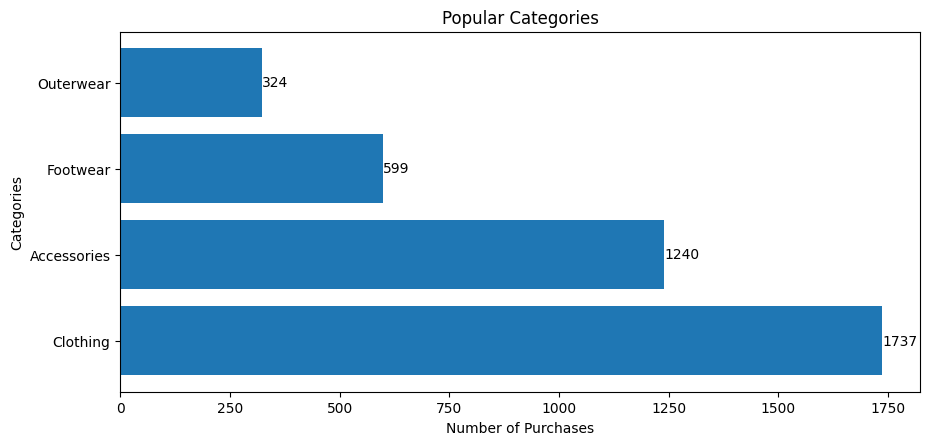

In [4]:
categories = shop_behavior_df['Category']
purchases = categories.value_counts()
plt.axes((0.5,0.5,1.25,0.75))
plt.xlabel("Number of Purchases")
plt.ylabel("Categories")
plt.title("Popular Categories")
pop_categories = plt.barh(purchases.index,purchases.values)
plt.bar_label(pop_categories)

plt.show()

Looking at this graph we can see that the most popular category of items purchased from this store being Clothing followed by Accessories. The least purchased category from this store is outerwear. Lets narrow the demographics some more to the customer's gender.

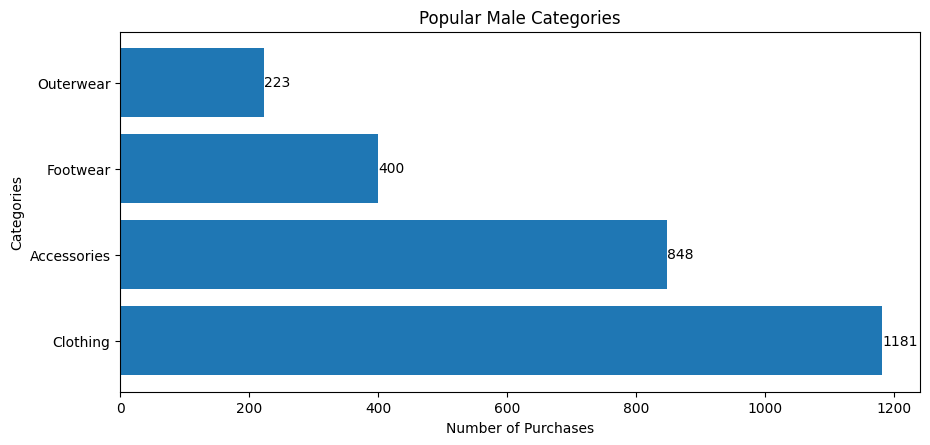

In [5]:
male_customers = shop_behavior_df[shop_behavior_df['Gender'] == 'Male']
male_categories = male_customers['Category']
purchases = male_categories.value_counts()
plt.axes((0.5,0.5,1.25,0.75))
plt.xlabel("Number of Purchases")
plt.ylabel("Categories")
plt.title("Popular Male Categories")
pop_categories = plt.barh(purchases.index,purchases.values)
plt.bar_label(pop_categories)

plt.show()

Just from this data alone we can see that the Male customers are the majority of this store's clientelle as 68% of this dataset are purchases performed by Males.

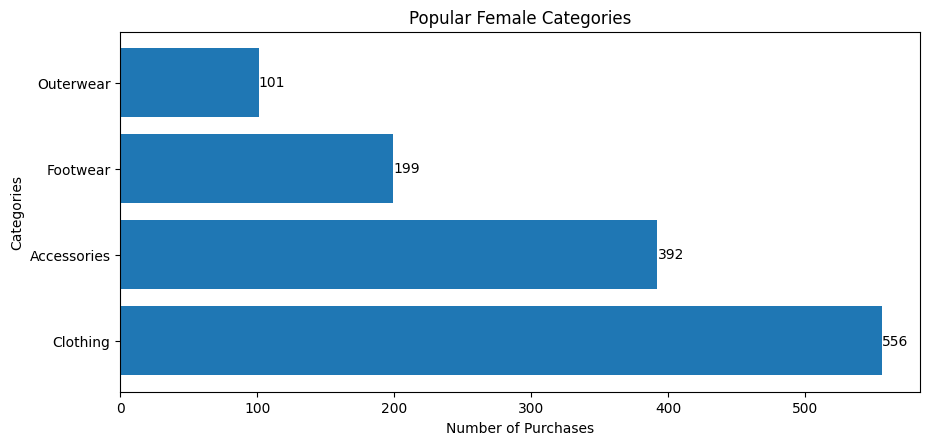

In [6]:
female_customers = shop_behavior_df[shop_behavior_df['Gender'] == 'Female']
female_categories = female_customers['Category']
purchases = female_categories.value_counts()
plt.axes((0.5,0.5,1.25,0.75))
plt.xlabel("Number of Purchases")
plt.ylabel("Categories")
plt.title("Popular Female Categories")
pop_categories = plt.barh(purchases.index,purchases.values)
plt.bar_label(pop_categories)

plt.show()

I did not notice any changes in regards to the most popular categories that are purchased by either gender so it is safe to say that the store should still put clothing as their main product to sell with accessories and footwear following after. The only data I have access to in regards to time are the seasons when the purchases take place so I cannot investigate for monthly or daily patterns. There are no Customer ID duplicates in the data either so I cannot investigate to see if there is a pattern a customer has when buying specific items. For example, do they replace a coat after 2-5 years? Do they only buy coats when it is nearing the winter months? I would be interested in investigating further if I was able to. Now that we know that clothing is the most popular category between both genders lets look at the types of clothing that customers are frequently buying.

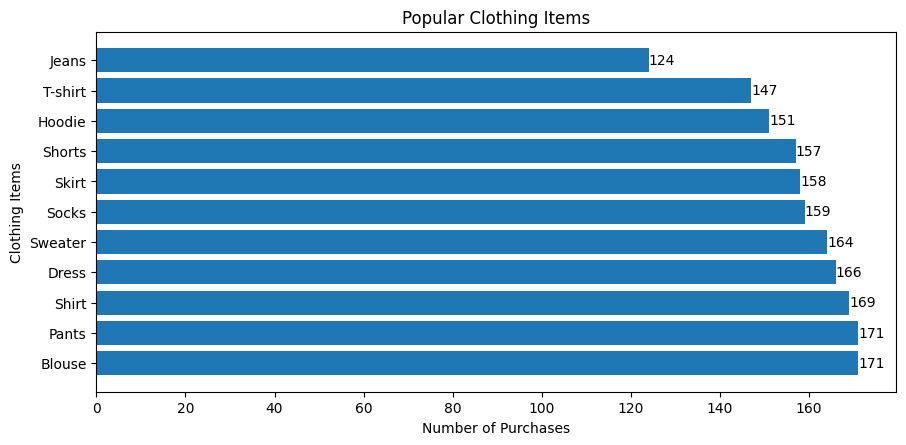

In [7]:
clothing_categories = shop_behavior_df[shop_behavior_df['Category'] == 'Clothing']
popular_clothing_items = clothing_categories['Item Purchased'].value_counts()
plt.axes((0.5,0.5,1.25,0.75))
plt.xlabel("Number of Purchases")
plt.ylabel("Clothing Items")
plt.title("Popular Clothing Items")
pop_cloth_items = plt.barh(popular_clothing_items.index,popular_clothing_items.values)
plt.bar_label(pop_cloth_items)

plt.show()

From just looking at the data it is interesting to find that jeans are the least popular item purchased in this dataset. The rest I can understand being evenly popular, although I would not normally expect 68% of males also buying skirts and dresses. I would assume that they are buying those types of clothing as gifts for spouses, girlfriends, or family. Let us confirm if that assumption is a possibility by filtering it by gender.

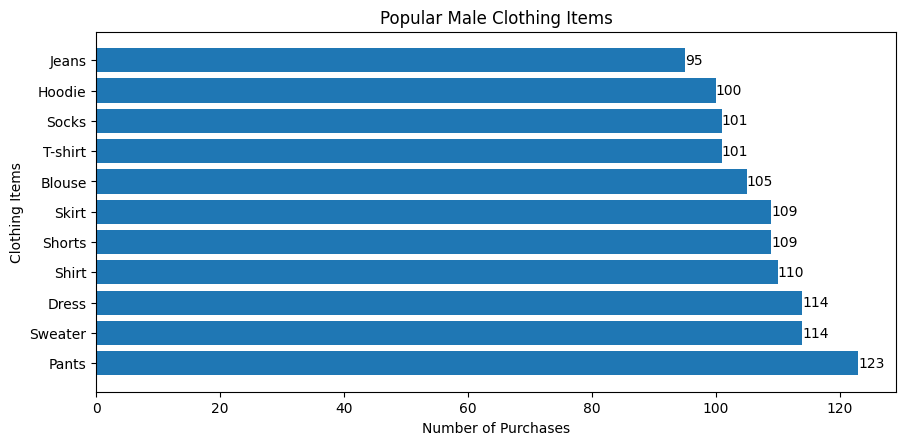

In [10]:
male_clothing_cats = clothing_categories[clothing_categories['Gender'] == 'Male']
popular_male_clothes_cats = male_clothing_cats['Item Purchased'].value_counts()
plt.clf()
plt.axes((0.5,0.5,1.25,0.75))
plt.xlabel("Number of Purchases")
plt.ylabel("Clothing Items")
plt.title("Popular Male Clothing Items")
pop_cloth_items = plt.barh(popular_male_clothes_cats.index,popular_male_clothes_cats.values)
plt.bar_label(pop_cloth_items)

plt.show()

This does definitely increase the possibility that the male clientele are buying dresses and skirts for gift purposes. Lets look at the holiday seasons (Fall and Winter) with this data to further narrow this down.

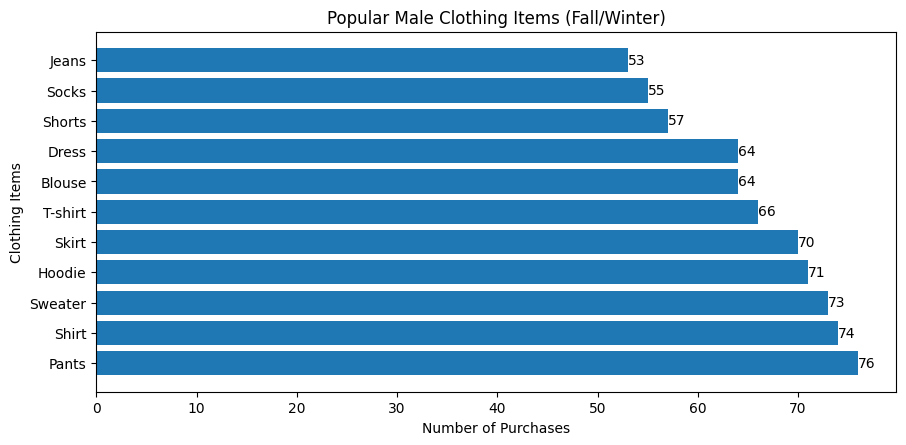

In [15]:
holiday_male_clothing_cats = clothing_categories[(clothing_categories['Gender'] == 'Male') & (clothing_categories['Season'] == 'Fall') | (clothing_categories['Season'] == 'Winter')]
holiday_popular_male_clothes_cats = holiday_male_clothing_cats['Item Purchased'].value_counts()
plt.clf()
plt.axes((0.5,0.5,1.25,0.75))
plt.xlabel("Number of Purchases")
plt.ylabel("Clothing Items")
plt.title("Popular Male Clothing Items (Fall/Winter)")
pop_cloth_items = plt.barh(holiday_popular_male_clothes_cats.index,holiday_popular_male_clothes_cats.values)
plt.bar_label(pop_cloth_items)

plt.show()

Yep, we can definitely confirm that about 60.1% (134 purchases) of the 223 dress and skirt purchases that were bought by male clients did their holiday shopping for spouses, girlfriends or family at the company's store this fiscal year. Looking at the data itself, majority of the purchases (61.2%) occurred around this time for all clothing items the company had in stock.